# Funciones de distribucion de probabilidades.
## Distribucion Uniforme.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

(array([ 99943., 100127.,  99843., 100833., 100193.,  99778.,  99781.,
         99240.,  99864., 100398.]),
 array([ 1.00008462, 10.90006044, 20.80003627, 30.7000121 , 40.59998792,
        50.49996375, 60.39993957, 70.2999154 , 80.19989123, 90.09986705,
        99.99984288]),
 <BarContainer object of 10 artists>)

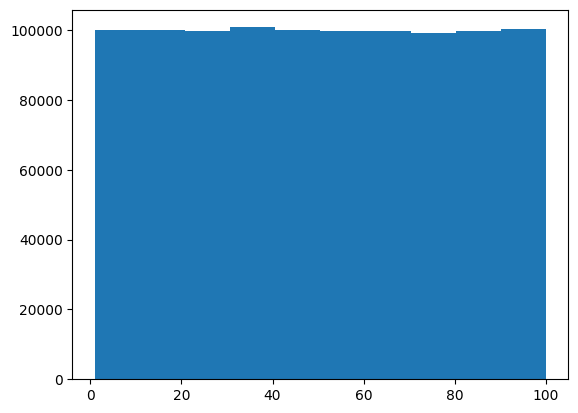

In [23]:
%matplotlib inline
plt.hist(data)

## Distribucion Normal

In [28]:
data = np.random.randn(1000000)

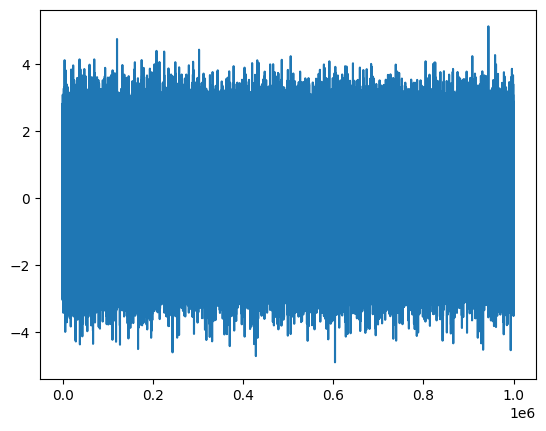

In [31]:
x = range(1,1000001)
plt.plot(x, data)

(array([7.00000e+01, 1.82900e+03, 2.76030e+04, 1.58384e+05, 3.58388e+05,
        3.22060e+05, 1.14775e+05, 1.59830e+04, 8.97000e+02, 1.10000e+01]),
 array([-4.8991393 , -3.89608792, -2.89303654, -1.88998517, -0.88693379,
         0.11611759,  1.11916897,  2.12222034,  3.12527172,  4.1283231 ,
         5.13137448]),
 <BarContainer object of 10 artists>)

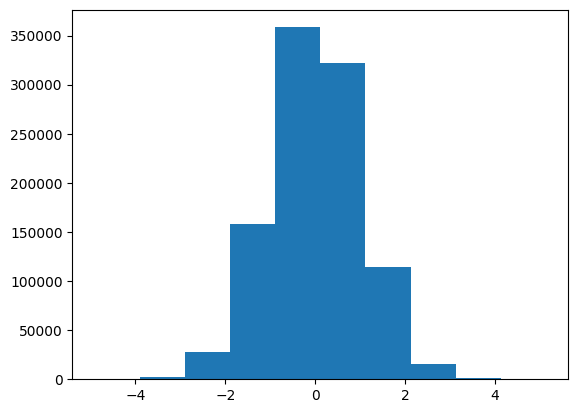

In [32]:
%matplotlib inline
plt.hist(data)

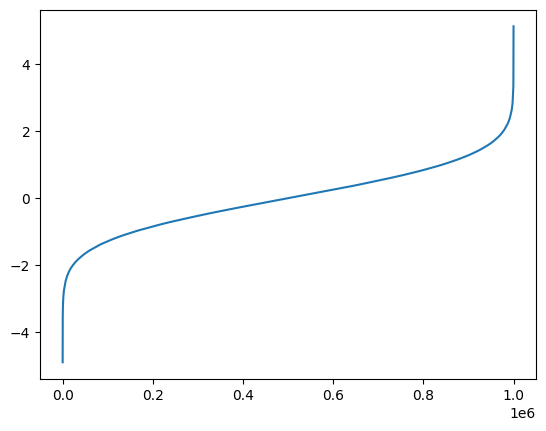

In [33]:
plt.plot(x,sorted(data))

### Simulacion de Montecarlo.
* Se Generan 2 numeros aleatorios uniforme x e y entre 0 y 1.
* Se calcula x^2 + y^y.
  * Si el valor es inferior a 1 -> esta dentro del circulo.
  * Si el valor es superior a 1 -> esta fuera del circulo.
* Se calcula el numero total de veces que estan dentro del circulo y se divide entre el numero total de intentos para obteenr una aproximacion de la probabilidad de caer dentro del circulo.
* Se usa la probabilidad para aproximar el valor de PI.
* Se repite el experimento un numero suficiente de veces (ejemplo 100), para obtener (100) diferentes aprooximaciones de PI.
* Se calcula el promedio de los 100 experimentos anteriores para dar un valor final en PI.

In [43]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

3.1439999999999997


(3.1439999999999997, [<matplotlib.lines.Line2D at 0x1df001e7bd0>])

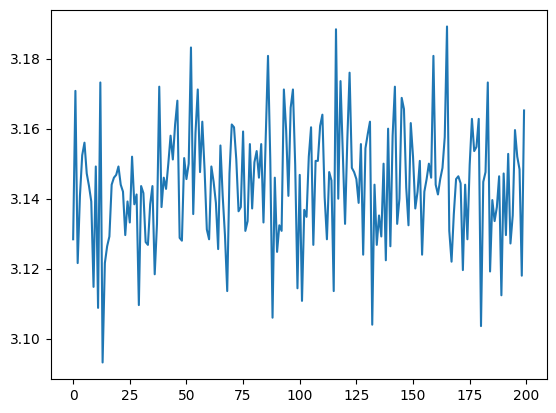

In [50]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

In [9]:
n = 10
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5,32,n)
    }
)

In [10]:
data

,A,B,C
0,0.287887,3.479450,9.349146
1,-0.354080,2.910027,23.303691
2,-0.906713,0.755336,6.805804
3,0.228291,2.831445,5.722718
4,0.323268,1.423714,6.029493
5,-0.852836,0.829061,22.939061
6,0.012718,3.239237,13.828372
7,-0.790075,-2.576346,8.626313
8,-0.245078,1.406999,11.259986
9,-0.884211,1.451669,7.677109


In [11]:
data.describe()

,A,B,C
count,10.000000,10.000000,10.000000
mean,-0.318083,1.575059,11.554169
std,0.513034,1.772814,6.569851
min,-0.906713,-2.576346,5.722718
25%,-0.837146,0.973545,7.023630
50%,-0.299579,1.437692,8.987730
75%,0.174398,2.890382,13.186276
max,0.323268,3.479450,23.303691


In [13]:
# Empalmando un data set a partir de un indice desde el 42 como ejemplo.
new_data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5,32,n)
    }, index = range(42, 42 + n)
)

In [14]:
new_data

,A,B,C
42,-0.530733,2.750624,5.810049
43,-0.567966,1.291829,23.411564
44,-0.231870,0.769596,12.927363
45,0.364440,3.419919,26.827266
46,1.638227,-1.837900,31.341921
47,-0.392682,-0.771533,20.827881
48,2.411811,2.451931,17.020212
49,0.093055,-4.496195,24.208533
50,-0.838223,-0.873076,21.447458
51,-0.758571,-2.822568,9.774357


In [15]:
# Agregacion de datos por categoria.
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [16]:
n = 500
gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [19]:
# N (m, s) -> m + s * z
height = 160 + 30 * np.random.rand(n)
wheight = 65 + 25 * np.random.rand(n)
age = 30 + 12 * np.random.rand(n)
income = 18000 + 3500 * np.random.rand(n)

In [29]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : wheight,
        "Age" : age,
        "Income" : income
    }
)

In [30]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,188.226274,86.785671,37.337257,18270.993289
1,Male,Middle Class,179.228402,83.789948,30.348800,21208.632605
2,Male,Rich,183.972353,80.544411,39.667540,18603.167986
3,Male,Poor,172.687687,73.058425,38.091400,19469.283489
4,Male,Middle Class,181.636992,89.362110,36.610015,19654.479858


In [32]:
## Agrupando datos por medio de variables categoricas.
grouped_gender = data.groupby("Gender")

In [33]:
grouped_gender.groups

{'Female': [0, 6, 11, 13, 14, 16, 17, 18, 20, 22, 24, 27, 31, 38, 42, 43, 44, 45, 46, 49, 51, 52, 54, 55, 56, 57, 58, 60, 63, 64, 65, 69, 70, 73, 74, 77, 78, 79, 85, 87, 88, 92, 93, 94, 97, 100, 102, 104, 105, 108, 110, 111, 114, 118, 119, 121, 124, 125, 126, 130, 131, 134, 135, 137, 139, 142, 153, 154, 155, 158, 159, 160, 161, 164, 165, 170, 171, 173, 174, 179, 183, 184, 185, 187, 188, 189, 190, 191, 194, 197, 199, 201, 202, 203, 204, 205, 212, 214, 215, 218, ...], 'Male': [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 19, 21, 23, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 47, 48, 50, 53, 59, 61, 62, 66, 67, 68, 71, 72, 75, 76, 80, 81, 82, 83, 84, 86, 89, 90, 91, 95, 96, 98, 99, 101, 103, 106, 107, 109, 112, 113, 115, 116, 117, 120, 122, 123, 127, 128, 129, 132, 133, 136, 138, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 156, 157, 162, 163, 166, 167, 168, 169, 172, 175, 176, 177, 178, ...]}

In [34]:
# Imprimiendo por secciones de names y groups.
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female            Rich  188.226274  86.785671  37.337257  18270.993289
6    Female    Middle Class  166.284622  87.067744  34.281345  18573.996883
11   Female            Poor  185.994447  83.770006  41.799232  18031.438233
13   Female            Rich  167.912334  83.556417  35.211957  19656.811281
14   Female            Poor  176.042072  84.690076  38.273082  21068.494483
..      ...             ...         ...        ...        ...           ...
491  Female            Poor  177.372221  75.569824  39.495964  20479.546283
493  Female            Poor  181.470999  67.742874  30.740376  18961.892513
494  Female    Middle Class  164.877360  71.360480  31.673601  19023.683844
496  Female    Middle Class  164.918944  81.620215  38.723923  21490.624532
499  Female    Middle Class  170.322286  70.222847  32.156119  18067.617174

[243 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [35]:
# Obteniendo una seccion del grupo.
Female = grouped_gender.get_group("Female")
Female

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,188.226274,86.785671,37.337257,18270.993289
6,Female,Middle Class,166.284622,87.067744,34.281345,18573.996883
11,Female,Poor,185.994447,83.770006,41.799232,18031.438233
13,Female,Rich,167.912334,83.556417,35.211957,19656.811281
14,Female,Poor,176.042072,84.690076,38.273082,21068.494483
...,...,...,...,...,...,...
491,Female,Poor,177.372221,75.569824,39.495964,20479.546283
493,Female,Poor,181.470999,67.742874,30.740376,18961.892513
494,Female,Middle Class,164.877360,71.360480,31.673601,19023.683844
496,Female,Middle Class,164.918944,81.620215,38.723923,21490.624532


In [36]:
# Agrupando por mas de una categoria.
double_group = data.groupby(["Gender", "Economic Status"])

In [37]:
len(double_group)

6

In [38]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
6    Female    Middle Class  166.284622  87.067744  34.281345  18573.996883
16   Female    Middle Class  186.491589  65.153700  31.181402  20982.931580
18   Female    Middle Class  175.847273  69.809029  30.318866  19092.299711
22   Female    Middle Class  183.386805  86.754558  32.976978  19122.864091
44   Female    Middle Class  169.011959  83.617392  32.506083  18731.560686
..      ...             ...         ...        ...        ...           ...
481  Female    Middle Class  182.951272  71.516089  35.323336  19332.482755
483  Female    Middle Class  183.665520  65.039786  38.860955  21405.756809
494  Female    Middle Class  164.877360  71.360480  31.673601  19023.683844
496  Female    Middle Class  164.918944  81.620215  38.723923  21490.624532
499  Female    Middle Class  170.322286  70.222847  32.156119  18067.617174

[80 rows x 6 columns]
('Female', 'Poor')
     Gender Economi